# Trabalho Pratico 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

dataset = pd.read_csv("data.csv", header=None)
Y = pd.read_csv("ids", header=None)

In [2]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19924 entries, 0 to 19923
Columns: 2209 entries, 0 to 2208
dtypes: float64(2209)
memory usage: 335.8 MB


,0,1,2,3,4,5,6,7,8,9,...,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208
0,0.077257,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.055755,0.0,0.0
2,0.042250,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.093693,0.0,0.099296,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.069105,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.036811,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.041917,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [3]:
Y.info()
Y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19924 entries, 0 to 19923
Data columns (total 1 columns):
0    19924 non-null object
dtypes: object(1)
memory usage: 155.7+ KB


,0
0,832e15531654188fa0b951faa5f68540dfb1ca5a
1,aa5163928a6edfd3bf69fd11fe763aacecf4602d
2,e886703afff0c70d6598bcae0c2d69a5a237807f
3,c1ea507b177b2e1673ce7a576057f91b75ae9d29
4,bbf73405c85d22702fafc1c0916e8f713810ff8d


We begin by exploring the data. The dimension is of 19924x2209, and a corresponding set of indexes 19924x1. Each of theses indexes is also the name of a file, in the docs/ folder, and theses files seem like random snippets of mailing lists and newsgroups. We expect a good metoid to be snippets of the same conversation.

We'll start by using the elbow method to find a good number of clusters.

In [4]:
Ks = np.arange(1, 1502, 100)
km = []
score = []
j = 0
for i in Ks:
    print(i)
    km.append(KMeans(n_clusters=i))
    score_i = km[j].fit(dataset).score(dataset)
    score.append(score_i)
    print("Score: ", score_i)
    j += 1

#plot(Ks,score)

1
Score:  -18320.8021089
101
Score:  -14116.2995369
201
Score:  -13170.4192973
301
Score:  -12675.7693276
401
Score:  -12328.3451326
501
Score:  -12065.6571996
601
Score:  -11810.94645
701
Score:  -11606.0793561
801
Score:  -11408.7367476
901
Score:  -11236.5880752
1001
Score:  -11059.6415017
1101
Score:  -10903.7601923
1201
Score:  -10736.0550325
1301
Score:  -10582.9450188
1401
Score:  -10439.2010107
1501
Score:  -10298.1156484


After choosing a number of groups we want, we'll find the indexes of the closest metoid for our data.

We'll then look at the snippets corresponding to a given group, and see if they talk about the same thing.

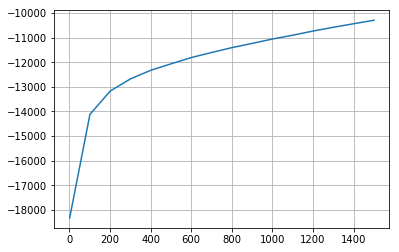

In [19]:
plt.plot(Ks,score)
plt.grid(True)
plt.show()

In [20]:
# chosen 100 arbitrarly for now, but we need to find the good number using the elbow method above
# 100 because we have 19924 files and my guess is about 200 snippets for each conversation (maybe that's a very bad guess)
chosen_km = KMeans(n_clusters=1500)
chosen_km.fit(dataset)
indexes = chosen_km.predict(dataset)
print(len(indexes))

19924


In [21]:
print(indexes)

[ 571  141 1271 ...,  911  444  313]


In [22]:
# find 10 docs for cluster n°42
n_cluster = 42
j = 0
for (i,index) in enumerate(indexes):
    if index == n_cluster:
        print(Y.iloc[[i]])
        j += 1
    if j > 10:
        break

                                             0
8522  77afd801cc7d1c7ac9c22a69d290fe1fa2cc4640
                                              0
10513  50bea4bbc8ccf3dd4e2c35946962a6d4e5dbb783
                                              0
11236  8ab8fd82bcd71526e28ad23708a7eea13ac53be0
                                              0
12829  15846efce8f36969f236ca7f696dc94ba27414aa
                                              0
12909  0eed5ae23154b81e2082daeefe889157240f6320
                                              0
19557  8b4fdf64ab85d55fdfe20eae64f5b81dbc06b2c3


Reading theses documents, we notice that ALL of them are from the newsgroup "comp.graphics" (and other newsgroups, but comp.graphics is the link between them all).

Let's try another cluster:

In [23]:
# find 10 docs for cluster n°42
n_cluster = 12
j = 0
for (i,index) in enumerate(indexes):
    if index == n_cluster:
        print(Y.iloc[[i]])
        j += 1
    if j > 10:
        break

                                            0
252  944b9944191004d1a31029d4c49e98da403118b1
                                            0
471  6bf3eaf16b0e2da4ee3aec05763d742066da81c0
                                            0
513  e55588e74161f0bd7ea3318d2c840bbd425840e8
                                            0
758  f0de66d427dfecd91608bc7ee3e1eeb779629364
                                            0
933  40abe8af2405c13dfac6eff39c4c7343de93d002
                                            0
963  c5fdd751fa090dcbfbb21e61b43ed395a6a75525
                                             0
1121  c866dcfa35ef4a5f75e780eb4ff077902d9a3185
                                             0
1145  590fa9d63e797e98fea61d1de205d422445ead07
                                             0
1311  19d61bec9270684807a24be96d92bb067a79bf5b
                                             0
1657  857d3cef954a6e2e0e0901c0c87893e1731807b1
                                             0
2009  ecfd8cf527b2069c75c

For this example, it doesn't work as well. This time the samples are about fairly large subjects (and different newsgroups) like baseball, politics and IBM hardware, but some are from the same topic. This suggests maybe the number of clusters isn't high enough.

Now we'll try to do PCA to reduce the number of features. First we'll find a good number of components:

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(dataset)
for i in range(-10,10):
    a = 0
    for x in pca.explained_variance_:
        if x < pow(10,i):
            a = a + 1
    print("< 10^"+str(i)+": "+str(a))

< 10^-10: 0
< 10^-9: 0
< 10^-8: 0
< 10^-7: 1
< 10^-6: 3
< 10^-5: 15
< 10^-4: 489
< 10^-3: 2050
< 10^-2: 2206
< 10^-1: 2209
< 10^0: 2209
< 10^1: 2209
< 10^2: 2209
< 10^3: 2209
< 10^4: 2209
< 10^5: 2209
< 10^6: 2209
< 10^7: 2209
< 10^8: 2209
< 10^9: 2209


We'll try to keep 1700 features, thus disregarding the ~500 features with a covariance inferiour to 10^-4. This will already help a lot with the calculations.

In [25]:
pca.n_components = 1700
X_reduced = pca.fit_transform(dataset)
X_reduced.shape

(19924, 1700)